In [1]:
import pandas as pd
import numpy as np
import missingno as msno

# Dataset
- Dataset 1 = 104 tweet
- Dataset 2 = 39 tweet

In [2]:
df_tweet1 = pd.read_csv("data/data_104.csv", names=['username', 'tweet'])
df_tweet2 = pd.read_csv("data/data_39.csv", names=['username', 'tweet'])
df_tweet3 = pd.read_csv("data/data_30.csv", names=['username', 'tweet'], encoding = "ISO-8859-1")

In [3]:
df_tweet3.head()

,username,tweet
0,putput_na,Cukup lawang sewu aja yg pintunya banyak..ke h...
1,arkangalang_,"Mending ngitungin pintu lawang sewu, beneran s..."
2,fathurfaa_,"He salamke penghuni bawah lawang sewu, aku kan..."
3,melatikusdew,@asrulbonek Ya kalo Semarang sih yg pasti Lawa...
4,NurulAinah,Akhirnya kesampaian juga kesini?????? @ Lawang...


df_tweet2.head()

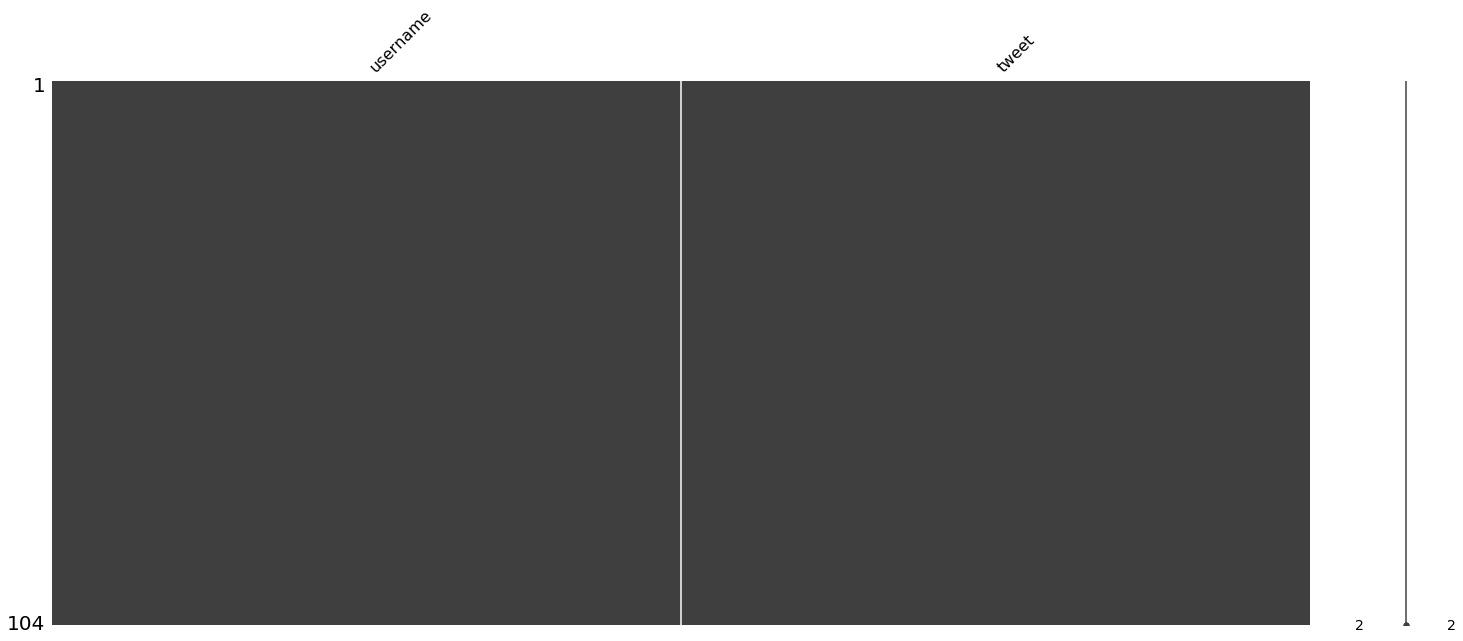

In [4]:
msno.matrix(df_tweet1)

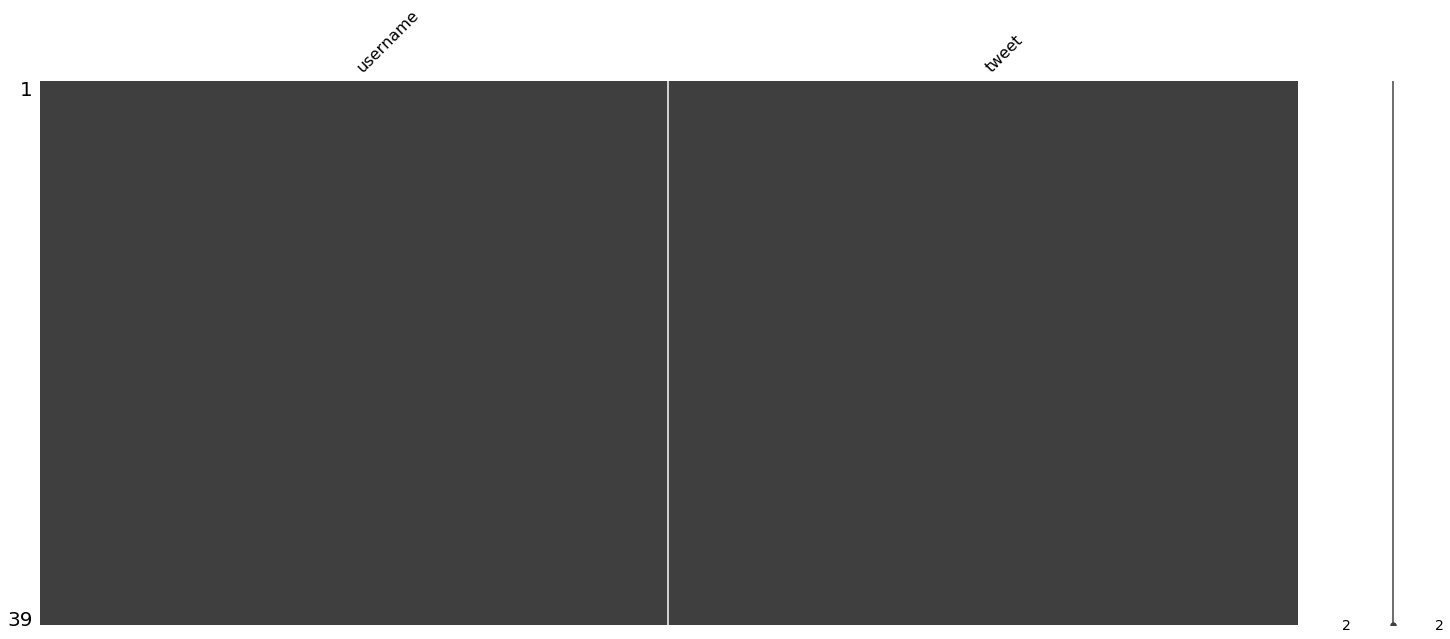

In [5]:
msno.matrix(df_tweet2)

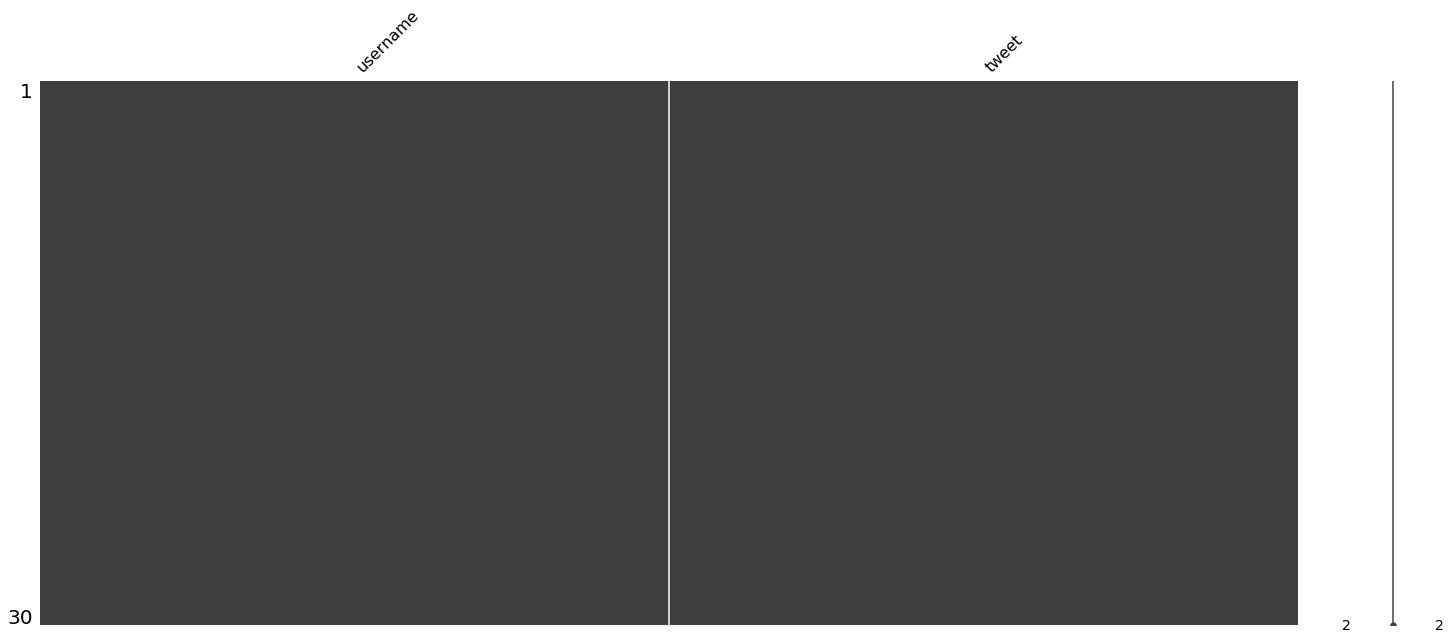

In [6]:
msno.matrix(df_tweet3)

In [7]:
document1 = df_tweet1['tweet'].tolist()
document2 = df_tweet2['tweet'].tolist()
document3 = df_tweet3['tweet'].tolist()

# Preprocessing

In [8]:
document = document3

In [9]:
# import
from preprocess.normalize import Normalize
from preprocess.tokenize import Tokenize
from preprocess.symspell import SymSpell

In [10]:
# initialize
normalizer = Normalize()
tokenizer = Tokenize()
symspell = SymSpell(max_dictionary_edit_distance=3)
symspell.load_complete_model_from_json('preprocess\data\corpus_complete_model.json', encoding="ISO-8859-1")

Loading dictionary...
Processing dictionary...
Copied 94811 words to master dictionary...
Copied 679534 hashes to master dictionary...


In [11]:
# do process
doc_preprocessed = []

for tweet in document:
    # normalize
    tweet_norm = normalizer.remove_ascii_unicode(tweet)
    tweet_norm = normalizer.remove_rt_fav(tweet_norm)
    tweet_norm = normalizer.lower_text(tweet_norm)
    tweet_norm = normalizer.remove_newline(tweet_norm)
    tweet_norm = normalizer.remove_url(tweet_norm)
    tweet_norm = normalizer.remove_emoticon(tweet_norm)
    tweet_norm = normalizer.remove_hashtag_mention(tweet_norm)
    tweet_norm = normalizer.remove_punctuation(tweet_norm)
    
    # tokenize
    tweet_tok = tokenizer.WordTokenize(tweet_norm, removepunct=True)
    
    # spell correction
    temp = []
    for token in tweet_tok:
        suggestion = symspell.lookup(phrase=token, verbosity=1, max_edit_distance=3)

        # option if there is no suggestion
        if len(suggestion) > 0:
            get_suggestion = str(suggestion[0]).split(':')[0]
            temp.append(get_suggestion)
        else:
            temp.append(token)
    tweet_prepared = ' '.join(temp)
    
    doc_preprocessed.append(tweet_prepared)

In [12]:
doc_preprocessed

['cukup lawang sewu aja di pintunya banyak ke haiku cukup satu pintu aja kamu menyerah',
 'mending hitungan pintu lawang sewu beneran seribu ga jumlahnya',
 'he salam penghuni bawah lawang sewu aku kangen lembu rondo',
 'ya kalo semarang sih di pasti lawang sewu sam poo kong kampung pelangi mas di di pusat kota tapi nek meh jatuhan dikit mending ke bendungan aja deh ada umbul sidomukti pondok kopi candi gedong santo taman bunga celana mas ke',
 'akhirnya kesampaian juga kesini lawang sewu',
 'tuku tahu neng lawang sewu kota merogoh makanku koe tinggal aku',
 'jadi gue ketilang nih kan di semarang bawah di jalan sekitaran pemuda sama lawang sewu itu tuh gara-gara gue gembos lampu merah',
 'delapan tahun lalu giat pesiar siswa ke lawang sewu semarang jateng silahkan cari tau ikon badan masing-masing saat ini',
 'hidup ini dapat menjadi petualangan yang menantang atau tidak berarti sama sekali lawang sewu semarang',
 'semua pintu mempunyai 1 kunci untuk membuka dan penuturnya kecuali pint

## Join nama attraction dengan '-'

In [13]:
attractions = ['lawang sewu']

def join_attraction(document, attractions):
    new_doc = []
    for doc in document:
        for att in attractions:
            if att in doc:
                att_split = att.split()
                att_strip = '-'.join(att_split)
                doc = doc.replace(att, att_strip)
        new_doc.append(doc)
    return new_doc

In [14]:
doc_preprocessed = join_attraction(doc_preprocessed, attractions)
doc_preprocessed

['cukup lawang-sewu aja di pintunya banyak ke haiku cukup satu pintu aja kamu menyerah',
 'mending hitungan pintu lawang-sewu beneran seribu ga jumlahnya',
 'he salam penghuni bawah lawang-sewu aku kangen lembu rondo',
 'ya kalo semarang sih di pasti lawang-sewu sam poo kong kampung pelangi mas di di pusat kota tapi nek meh jatuhan dikit mending ke bendungan aja deh ada umbul sidomukti pondok kopi candi gedong santo taman bunga celana mas ke',
 'akhirnya kesampaian juga kesini lawang-sewu',
 'tuku tahu neng lawang-sewu kota merogoh makanku koe tinggal aku',
 'jadi gue ketilang nih kan di semarang bawah di jalan sekitaran pemuda sama lawang-sewu itu tuh gara-gara gue gembos lampu merah',
 'delapan tahun lalu giat pesiar siswa ke lawang-sewu semarang jateng silahkan cari tau ikon badan masing-masing saat ini',
 'hidup ini dapat menjadi petualangan yang menantang atau tidak berarti sama sekali lawang-sewu semarang',
 'semua pintu mempunyai 1 kunci untuk membuka dan penuturnya kecuali pint

# HMM POS TAGGER

In [15]:
# import
from hmmtagger.tagger import MainTagger
from tokenization import *

In [16]:
# initialize
tagger = MainTagger("resource/Lexicon.trn", "resource/Ngram.trn", 0, 3, 3, 0, 0, False, 0.2, 0, 500.0, 1)

In [17]:
# do process
doc_tagged = []

for tweet in doc_preprocessed:
    if len(tweet) == 0: continue
    out = sentence_extraction(cleaning(tweet))

    join_token = []
    for o in out:
        strtag = " ".join(tokenisasi_kalimat(o)).strip()
        join_token.extend(tagger.taggingStr(strtag))
    doc_tagged.append(' '.join(join_token))

In [18]:
doc_tagged

['cukup/JJ lawang-sewu/NN aja/NN di/IN pintunya/NN banyak/JJ ke/IN haiku/NN cukup/JJ satu/CDP pintu/NN aja/NN kamu/PRP menyerah/VBT',
 'mending/JJ hitungan/JJ pintu/NN lawang-sewu/NN beneran/NN seribu/NN ga/NN jumlahnya/NNG',
 'he/NN salam/NN penghuni/NN bawah/NN lawang-sewu/NN aku/NN kangen/NN lembu/NN rondo/NN',
 'ya/UH kalo/NN semarang/NN sih/NN di/IN pasti/NN lawang-sewu/NN sam/NN poo/NN kong/NN kampung/NN pelangi/NN mas/NN di/IN di/IN pusat/NN kota/NN tapi/CC nek/JJ meh/VBT jatuhan/NN dikit/VBT mending/JJ ke/IN bendungan/NN aja/NN deh/NN ada/VBI umbul/NN sidomukti/NN pondok/NN kopi/NN candi/NN gedong/NN santo/RB taman/NN bunga/NN celana/NN mas/NN ke/IN',
 'akhirnya/RB kesampaian/NN juga/RB kesini/NN lawang-sewu/NN',
 'tuku/NN tahu/VBI neng/NN lawang-sewu/NN kota/NN merogoh/VBT makanku/NN koe/NN tinggal/VBI aku/NN',
 'jadi/JJ gue/NN ketilang/NN nih/NNP kan/RP di/IN semarang/NN bawah/NN di/IN jalan/NN sekitaran/NN pemuda/NN sama/JJ lawang-sewu/NN itu/DT tuh/NN gara-gara/NN gue/NN ge

# Tag Class

In [19]:
# define
Ccon = ['JJ', 'NN','NNP', 'NNG', 'VBI', 'VBT']
Cfnc = ['OP', 'CP', 'GM', ';', ':', '"', '.',
         ',', '-', '...', 'RB', 'IN', 'MD', 'CC',
         'SC', 'DT', 'UH', 'CDO', 'CDC', 'CDP', 'CDI',
         'PRP', 'WP', 'PRN', 'PRL', 'NEG', 'SYM', 'RP', 'FW']

In [20]:
# do process
doc_classified = []

for tweet in doc_tagged:
    if len(tweet) == 0: continue
    tweet_split = tweet.split(' ')
    
    temp = {"Content": [], "Function": []}
    con = []
    fnc = []
    
    for token in tweet_split:
        word = token.split('/', 1)[0]
        tag = token.split('/', 1)[1]
        
        if tag in Ccon:
            con.append(token)
        elif tag in Cfnc:
            fnc.append(token)
            
    temp["Content"].append(' '.join(con))
    temp["Function"].append(' '.join(fnc))
    
    doc_classified.append(temp)

In [21]:
doc_classified

[{'Content': ['cukup/JJ lawang-sewu/NN aja/NN pintunya/NN banyak/JJ haiku/NN cukup/JJ pintu/NN aja/NN menyerah/VBT'],
  'Function': ['di/IN ke/IN satu/CDP kamu/PRP']},
 {'Content': ['mending/JJ hitungan/JJ pintu/NN lawang-sewu/NN beneran/NN seribu/NN ga/NN jumlahnya/NNG'],
  'Function': ['']},
 {'Content': ['he/NN salam/NN penghuni/NN bawah/NN lawang-sewu/NN aku/NN kangen/NN lembu/NN rondo/NN'],
  'Function': ['']},
 {'Content': ['kalo/NN semarang/NN sih/NN pasti/NN lawang-sewu/NN sam/NN poo/NN kong/NN kampung/NN pelangi/NN mas/NN pusat/NN kota/NN nek/JJ meh/VBT jatuhan/NN dikit/VBT mending/JJ bendungan/NN aja/NN deh/NN ada/VBI umbul/NN sidomukti/NN pondok/NN kopi/NN candi/NN gedong/NN taman/NN bunga/NN celana/NN mas/NN'],
  'Function': ['ya/UH di/IN di/IN di/IN tapi/CC ke/IN santo/RB ke/IN']},
 {'Content': ['kesampaian/NN kesini/NN lawang-sewu/NN'],
  'Function': ['akhirnya/RB juga/RB']},
 {'Content': ['tuku/NN tahu/VBI neng/NN lawang-sewu/NN kota/NN merogoh/VBT makanku/NN koe/NN ting

In [22]:
# split document content and function
doc_content = []
for tweet in doc_classified:
    doc_content.append(''.join(tweet['Content']))

print(doc_content)
print()

# split tag and word
doc_prepared = []
for tweet in doc_content:
    tweet_split = tweet.split(' ')
    
    temp = []
    for token in tweet_split:
        word = token.split('/', 1)[0]
        temp.append(word)
    
    doc_prepared.append(temp)

print(doc_prepared)

['cukup/JJ lawang-sewu/NN aja/NN pintunya/NN banyak/JJ haiku/NN cukup/JJ pintu/NN aja/NN menyerah/VBT', 'mending/JJ hitungan/JJ pintu/NN lawang-sewu/NN beneran/NN seribu/NN ga/NN jumlahnya/NNG', 'he/NN salam/NN penghuni/NN bawah/NN lawang-sewu/NN aku/NN kangen/NN lembu/NN rondo/NN', 'kalo/NN semarang/NN sih/NN pasti/NN lawang-sewu/NN sam/NN poo/NN kong/NN kampung/NN pelangi/NN mas/NN pusat/NN kota/NN nek/JJ meh/VBT jatuhan/NN dikit/VBT mending/JJ bendungan/NN aja/NN deh/NN ada/VBI umbul/NN sidomukti/NN pondok/NN kopi/NN candi/NN gedong/NN taman/NN bunga/NN celana/NN mas/NN', 'kesampaian/NN kesini/NN lawang-sewu/NN', 'tuku/NN tahu/VBI neng/NN lawang-sewu/NN kota/NN merogoh/VBT makanku/NN koe/NN tinggal/VBI aku/NN', 'jadi/JJ gue/NN ketilang/NN nih/NNP semarang/NN bawah/NN jalan/NN sekitaran/NN pemuda/NN sama/JJ lawang-sewu/NN tuh/NN gara-gara/NN gue/NN gembos/JJ lampu/NN', 'tahun/NN lalu/JJ giat/NN pesiar/NN siswa/NN lawang-sewu/NN semarang/NN jateng/NN silahkan/NN cari/NN tau/VBT ikon/N

# LDA

In [23]:
# import
from lda.ldamodel import LdaModel

In [24]:
num_topics = [2, 3, 4]
alpha = [0.1, 0.01, 0.001]
beta = [0.1, 0.01, 0.001]
iterations = 1000

In [25]:
%%time

# data frame perplexity
df_perplexity = pd.DataFrame(columns=['ID Kombinasi', 'K', 'Alpha', 'Beta', 'Perplexity'])
index = 1

for i in num_topics:
    for j in alpha:
        for k in beta:
            lda = LdaModel(doc_prepared, i, j, k, iterations)
            df_perplexity = df_perplexity.append({'ID Kombinasi': 'K-'+str(index),
                                                  'K': i,
                                                  'Alpha': j,
                                                  'Beta': k,
                                                  'Perplexity': lda.perplexity()}, ignore_index=True)
            index +=1 

Wall time: 4min 48s


In [26]:
df_perplexity

,ID Kombinasi,K,Alpha,Beta,Perplexity
0,K-1,2,0.100,0.100,8.627647
1,K-2,2,0.100,0.010,8.427248
2,K-3,2,0.100,0.001,8.320127
3,K-4,2,0.010,0.100,8.212398
4,K-5,2,0.010,0.010,8.240375
5,K-6,2,0.010,0.001,8.240422
6,K-7,2,0.001,0.100,8.220703
7,K-8,2,0.001,0.010,8.062791
8,K-9,2,0.001,0.001,8.064940
9,K-10,3,0.100,0.100,7.740778


In [27]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np

c:\users\yasir\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


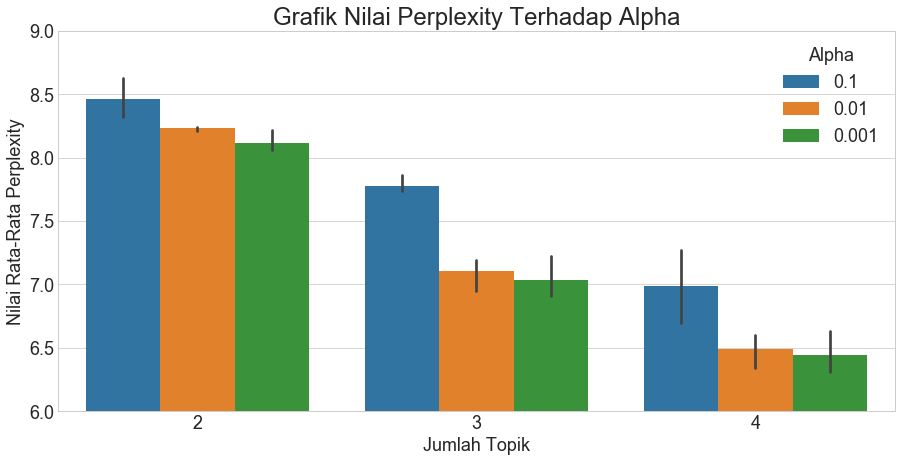

In [28]:
fig, ax = plt.subplots(figsize=(15, 7))
g = sns.barplot(x="K", y="Perplexity", hue="Alpha", hue_order=[0.1, 0.01, 0.001], data=df_perplexity, ax=ax)

ax.set_title("Grafik Nilai Perplexity Terhadap Alpha", fontsize=24)
ax.set_ylabel('Nilai Rata-Rata Perplexity', fontsize=18)
ax.set_xlabel('Jumlah Topik', fontsize=18)
ax.set_ylim(6, 9)
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

fig.savefig("Perplexity Alpha.png")
plt.show()

c:\users\yasir\anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


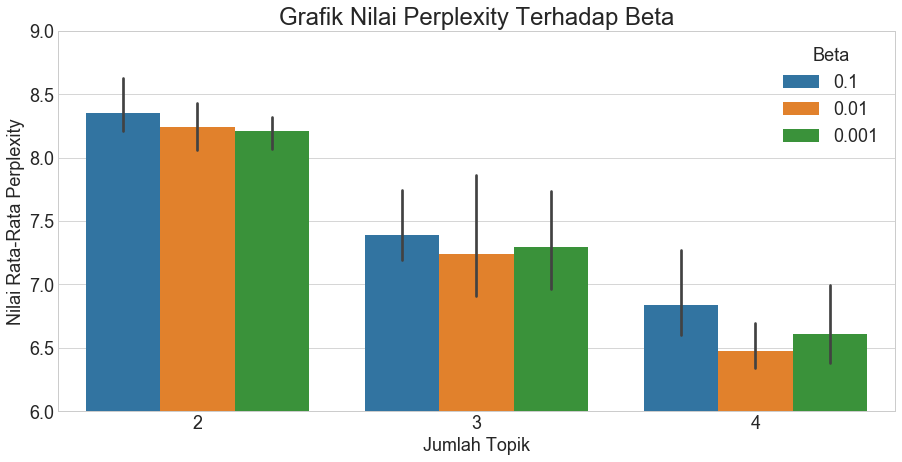

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
g = sns.barplot(x="K", y="Perplexity", hue="Beta", hue_order=[0.1, 0.01, 0.001], data=df_perplexity, ax=ax)

ax.set_title("Grafik Nilai Perplexity Terhadap Beta", fontsize=24)
ax.set_ylabel('Nilai Rata-Rata Perplexity', fontsize=18)
ax.set_xlabel('Jumlah Topik', fontsize=18)
ax.set_ylim(6, 9)
plt.setp(ax.get_legend().get_texts(), fontsize='18') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title

fig.savefig("Perplexity Beta.png")
plt.show()

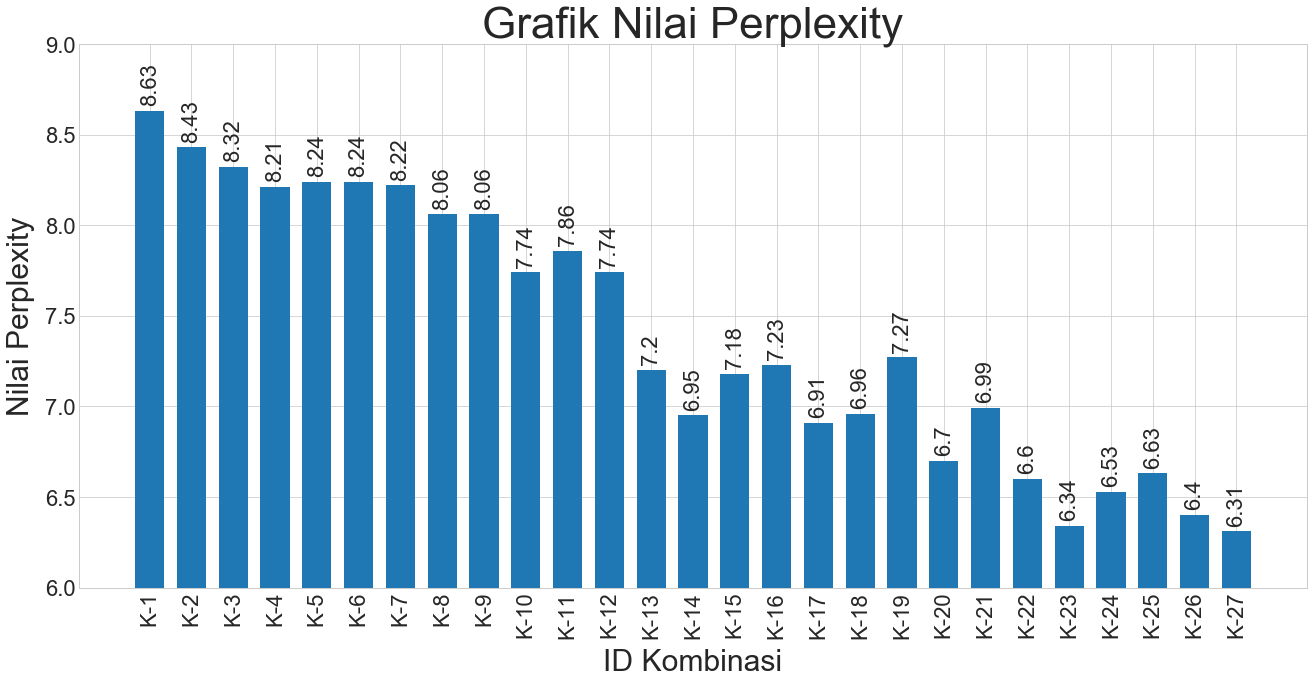

In [30]:
x = df_perplexity['ID Kombinasi'].values
y = np.around(df_perplexity['Perplexity'].values, decimals=2)
topics = [2, 3, 4]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(22,10))
plt.bar(x, y, width=0.7)

plt.ylim(6, 9)
plt.xticks([r for r in range(len(x))], [x for x in x], fontsize=22, rotation=90)

label = [p for p in y]
for index, value in enumerate(x):
    plt.text(x=index, y=y[index]+0.03, s=label[index], fontsize=22, ha='center', va='bottom', rotation=90)

plt.title('Grafik Nilai Perplexity', fontsize=44)
plt.xlabel('ID Kombinasi', fontsize=30, labelpad=10)
plt.ylabel('Nilai Perplexity', fontsize=30, labelpad=10)
plt.savefig('Perplexity.png')
plt.show(block=False)

In [31]:
# best kombinasi parameter
lda = LdaModel(doc_prepared, 4, 0.001, 0.01, iterations)
lda.perplexity()

6.39582719709863

In [32]:
# get words
result = lda.get_topic_word_pwz(doc_content)
df_lda = pd.DataFrame(result, columns=['Topik', 'Kata', 'PWZ'])
print(df_lda[df_lda['Topik']==0]['Kata'].to_string(index=False))

lantai/NN
      ruang/NN
      bawah/NN
       aula/NN
       ada/VBI
      besar/JJ
  terbalik/VBI
  terbalik/VBT
      tanah/NN
  dibangun/VBT
       gini/NN
 digunakan/VBT
        air/NN
dilengkapi/VBT
    belanda/NN
  pendingin/NN
    penjara/NN
        aku/NN
berjendela/VBI
     tempat/NN
